In [43]:
!pip install pymssql

In [11]:
import numpy as np

import pandas as pd

%matplotlib inline

import matplotlib.pyplot as plt

import seaborn as sns

from sqlalchemy import create_engine

import psycopg2

import pymssql

In [46]:
engine_name = ('mssql+pymssql://localhost/actimat')
engine = create_engine(engine_name)
engine.table_names()
connection = engine.connect()

In [82]:
df = pd.read_sql_table('RecordProduct', connection)
df_product = pd.read_sql_table('Product', connection)
check_id(df, 'Identifier')

In [72]:
def check_id(dataframe, field_name):
    assert dataframe[field_name].nunique() == len(dataframe[field_name])

TypeError: 'function' object is not iterable

In [77]:
df.groupby('IdentifierProduct')['Quantity'].describe()

count         mean          std    min     25%    50%  \
IdentifierProduct                                                           
5.0                   9.0     1.333333     0.707107    1.0    1.00    1.0   
7.0                 693.0    27.935065   188.395645    1.0    1.00    1.0   
10.0               7844.0     1.699516     9.956009    0.0    1.00    1.0   
11.0                 75.0     1.480000     1.107224    1.0    1.00    1.0   
12.0                  8.0   381.375000   315.985053    1.0  175.00  375.0   
13.0                111.0    36.261261    77.206537    1.0    1.00    1.0   
14.0               1371.0     9.989059    60.955260    1.0    1.00    1.0   
15.0               1646.0    69.169502   439.165587    1.0    1.00    2.0   
16.0               1021.0    29.856024   213.754390    0.0    1.00    1.0   
17.0                 83.0    93.096386   212.211676    1.0    4.00   25.0   
18.0                  1.0    10.000000          NaN   10.0   10.00   10.0   
20.0                 75.0   261.946667   314.060198    1.0    1.00  100.0   
21.0                679.0    73.902798   367.144377    1.0    1.00    3.0   
22.0                148.0   114.351351   229.489966    1.0    1.00   20.0   
24.0                  6.0  1508.333333  2229.443129   50.0  500.00  750.0   
25.0                356.0    40.103933   172.718946    1.0    1.00    2.0   
26.0                 18.0     4.944444     4.465189    1.0    1.00    3.0   
27.0                  4.0     1.000000     0.000000    1.0    1.00    1.0   
28.0                128.0    47.593750   170.183432    1.0    1.00    2.0   
29.0                624.0    10.240385    86.321267    1.0    1.00    2.0   
30.0                145.0     8.779310    39.693001    1.0    1.00    1.0   
31.0               2098.0     7.064347    22.196421    0.0    1.00    1.0   
34.0                 47.0     1.872340     1.345153    1.0    1.00    1.0   
35.0                126.0     6.603175    13.945080    1.0    1.00    2.0   
37.0                 13.0     1.000000     0.000000    1.0    1.00    1.0   
39.0                  5.0     1.000000     0.000000    1.0    1.00    1.0   
41.0                 11.0     1.272727     0.467099    1.0    1.00    1.0   
43.0                  2.0     1.000000     0.000000    1.0    1.00    1.0   
46.0                 25.0     2.800000     4.262237    1.0    1.00    1.0   
48.0                 10.0     2.600000     2.716207    1.0    1.00    2.0   
...                   ...          ...          ...    ...     ...    ...   
161.0                 2.0   500.000000     0.000000  500.0  500.00  500.0   
166.0                12.0     1.000000     0.000000    1.0    1.00    1.0   
167.0                 4.0     1.000000     0.000000    1.0    1.00    1.0   
168.0                11.0     1.000000     0.000000    1.0    1.00    1.0   
169.0                 1.0     1.000000          NaN    1.0    1.00    1.0   
170.0                 8.0     6.250000     8.598173    1.0    1.00    1.0   
171.0                 7.0     1.000000     0.000000    1.0    1.00    1.0   
172.0                 4.0     1.000000     0.000000    1.0    1.00    1.0   
173.0                 9.0     1.000000     0.000000    1.0    1.00    1.0   
174.0                21.0     2.666667     4.222953    1.0    1.00    1.0   
175.0                41.0     4.073171     8.620877    1.0    1.00    1.0   
177.0                 2.0    35.000000    21.213203   20.0   27.50   35.0   
179.0               141.0    29.460993   111.840545    1.0    1.00    2.0   
180.0                11.0    91.636364   169.599099    1.0    1.00    1.0   
183.0                69.0     2.695652     8.257446    1.0    1.00    1.0   
185.0               281.0     1.046263     0.464445    1.0    1.00    1.0   
187.0                 4.0    15.000000    23.565512    1.0    1.00    4.5   
188.0                61.0     1.000000     0.000000    1.0    1.00    1.0   
190.0                22.0     7.772727    11.775405    1.0    1.00    1.0   
191.0           

In [61]:
df.loc[c]['UnitSellingPrice']

189409    0.0
Name: UnitSellingPrice, dtype: float64

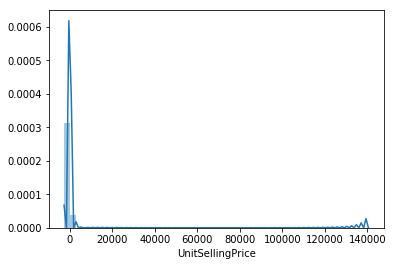

In [80]:
sns.distplot(df['UnitSellingPrice'])

In [83]:
product_ids = df_product['Identifier'].tolist()

df['IdentifierProduct'].isin(product_ids).mean()

0.9993497821770293

In [84]:
dfs['position'].groupby('time')['id'].count().resample('H').sum().plot()
pd.merge(dfs['dessert'], dfs['position'])

now = dfs['position']['timestamp'].max()
c = dfs['position']['timestamp'] >= now - dt.timedelta(minutes = 3)

last_position = dfs['position'].loc[c] \
                               .sort_values(by='timestamp')
                               .drop_duplicates(subset='vehicule_ikd', kee=last)

NameError: name 'dfs' is not defined